In [115]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import os
from PIL import Image
import torch

In [107]:
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

In [125]:
class ReverseNormalization(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std
        
    def __call__(self, image):
        original_img = np.zeros(img.shape)

        for i in range(3):
            original_img[:, :, i] = img[:, :, i] * self.std[i] + self.mean[i]
            
        return original_img
    
class TensorToDevice(object):
    def __init__(self, device):
        self.device = device
        
    def __call__(self, image):
        image = image.to(self.device)
        return image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


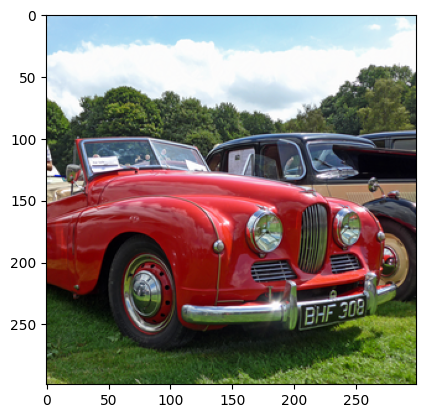

In [112]:
with open("adversarial_images/b217644382dcd864.npy", 'rb') as f:
    img = np.load(f)
    
img = np.transpose(img, (1, 2, 0))

reverse_normalize = ReverseNormalization(mean, std)

img = reverse_normalize(img)

plt.imshow(img)
 

In [158]:
class AdversarialDataset(Dataset):
    def __init__(self, annotation_file, categories_file, img_dir, adv_dir, transform=None):
        self.img_dir = img_dir
        self.adv_dir = adv_dir
        annotations = pd.read_csv(annotation_file)
        self.categories = pd.read_csv(categories_file)
        self.images = annotations["ImageId"]
        self.labels = annotations["TrueLabel"]
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.images[idx] + ".png")
        image = plt.imread(img_path)
        adv_path = os.path.join(self.adv_dir, self.images[idx] + ".npy")
        with open(adv_path, 'rb') as f:
            adv_img = np.load(f)
            adv_img = np.transpose(adv_img, (1, 2, 0))

        if self.transform:
            image = self.transform(image)
            adv_img = self.transform(adv_img)

        return image, adv_img, self.labels[idx] - 1, self.images[idx]

In [174]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

transform = transforms.Compose([
    transforms.ToTensor(),
    TensorToDevice(device)
])

dataset = AdversarialDataset("images.csv", "categories.csv", "images", "adversarial_images", transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

cuda:0


In [175]:
for img, adv_img, label in dataloader:
    print(img.device)
    print(adv_img.device)
    print(label.device)

FileNotFoundError: [Errno 2] No such file or directory: 'adversarial_images\\6bea02f26beef50d.npy'